# Simple Timeseries EDA Template

### Overview Steps:
    1. Research and Brainstorm
    2. Preprocessing
    3. Individual Variable Timeseries Exploration
    4. Decomposition Exploration
    5. Variable Correlation Timeseries Exploration
    6. Conclusion and Next Steps

## 1. Research and Brainstorm

### Research the context of the data
    - how was the data collected?
    - who collected the data?
    - are there any biases that could have come from the data?
    - is there any domain knowledge needed in order to informly explore this data?
    - are there any variables that require research to understand their full meaning?
### Brainstorm questions and concepts that may or may not be answered with the data
    - are there any variables you suspect would correlate?
    - are there any variables that are expected to have certain trends or values?

## 2. Preprocessing

### Important issues to look for in the data

#### Duplicates
    - does the data have duplicates that need to be removed?
    - how does keeping or removing duplicate values change the insight from later EDA?
#### Null Values 
    - does the data have null values that should be removed?
    - how does keeping or removing null values change the insight from later EDA?
#### Oulier Values
    - do categorical varibles have resonable responses - example variables states have only real states?
    - do quantitative variables have a resonable range and standard deviation?
#### Inconsistent formats
    - do the variables have data types that make sense for the variable?

In [55]:
#load in packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:
#load in data
#https://www.kaggle.com/srinuti/residential-power-usage-3years-data-timeseries

data = pd.read_csv("Data/power_usage_2016_to_2020.csv", header=0, parse_dates=[0])

#have a large dataset?

# ! pip install datatble
# import datatable as dt
# data = dt.fread("").to_pandas()

In [57]:
data.head()

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday


In [58]:
#number of duplicates 
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


In [59]:
#number of na values by variable
nulls = data.isnull().sum().sort_values(ascending=False)
print("Number of missing values:")
nulls.head(20)

Number of missing values:


StartDate      0
Value (kWh)    0
day_of_week    0
notes          0
dtype: int64

In [60]:
#observe unique values of variables to see if anything is sus
for variables in data.columns:
    print("----------------------------------------------")
    print("unique values of variable: " + str(variables))
    print(data[variables].unique())

----------------------------------------------
unique values of variable: StartDate
['2016-01-06T00:00:00.000000000' '2016-01-06T01:00:00.000000000'
 '2016-01-06T02:00:00.000000000' ... '2020-07-07T21:00:00.000000000'
 '2020-07-07T22:00:00.000000000' '2020-07-07T23:00:00.000000000']
----------------------------------------------
unique values of variable: Value (kWh)
[1.057 1.171 0.56  ... 2.985 2.93  2.872]
----------------------------------------------
unique values of variable: day_of_week
[2 5 6 4 0 1 3]
----------------------------------------------
unique values of variable: notes
['weekday' 'weekend' 'vacation' 'COVID_lockdown']


In [61]:
#statistical values of numerical variables
data.describe()

,Value (kWh),day_of_week
count,35952.000000,35952.000000
mean,0.891631,2.997330
std,0.908133,1.999024
min,0.064000,0.000000
25%,0.323750,1.000000
50%,0.501000,3.000000
75%,1.072000,5.000000
max,6.446000,6.000000


In [62]:
#find format of variables
print(data.dtypes)

StartDate      datetime64[ns]
Value (kWh)           float64
day_of_week             int64
notes                  object
dtype: object


## 3. Individual Variables Exploration
    - is there a dominated value for certain variables?
    - is there an interesting distribution within the responses?
    - do the responses make sense based on the context and background of the data?

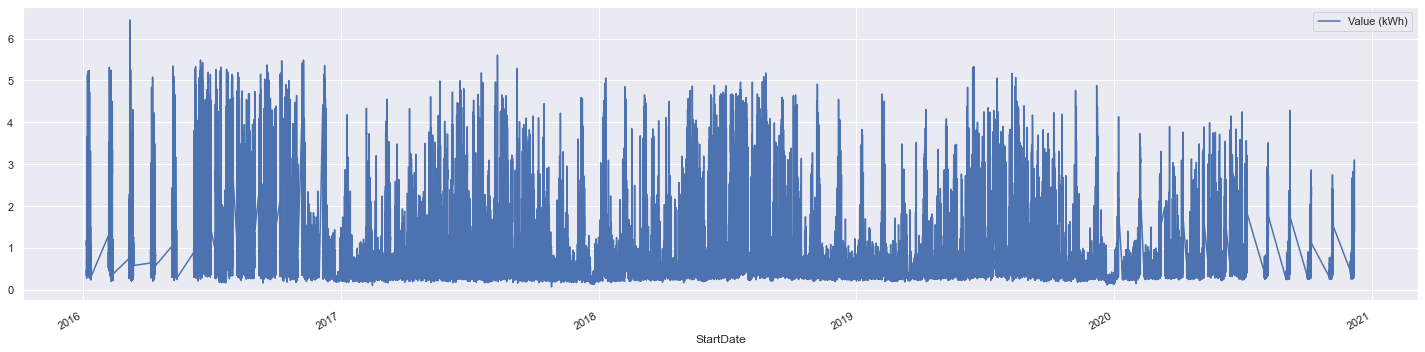

In [63]:
data1 = data[['StartDate', 'Value (kWh)']]
data1 = data1.set_index('StartDate')
data1.plot(figsize=(25,6))
pass

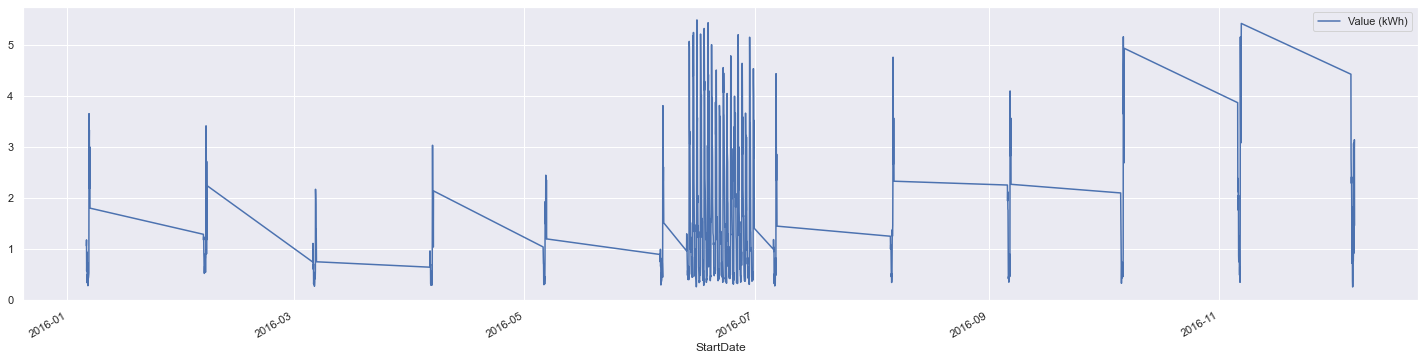

In [64]:
#lets look at only a month of data
one_month = data1[:720]
one_month.plot(figsize=(25,6))
pass

## 4. Decomposition Plots
#### Import components of time series:
- trend - a long-term increase of decrease in the data
- seasonality - data is affected by seasonal factors - hours of the day, week, month, year
- cycles - occurs when the data ehibits rises and falls that are not of a fixed frequency
- random noise - residuals 

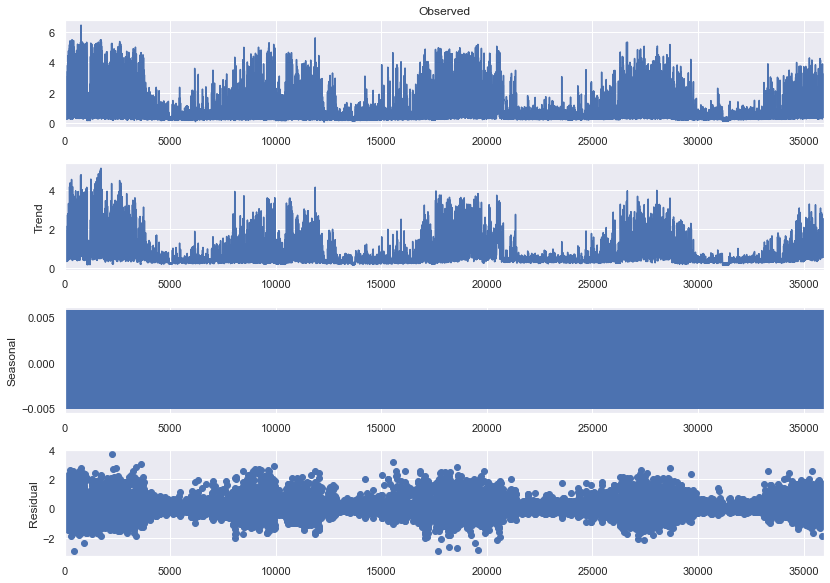

In [65]:
#set size for plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

#decomposition of the entire data set
seasonal_decompose(np.array(data1), model='additive', period=7).plot()
pass

## 5. Variable Correlation Timeseries Exploration


In [66]:
#Often important to aggregate many of the features to compare
day_week_mean = data.groupby('day_of_week')['Value (kWh)'].mean()
day_week_mean.head(20)

day_of_week
0    0.861824
1    0.870365
2    0.866909
3    0.903988
4    0.883665
5    0.919860
6    0.934904
Name: Value (kWh), dtype: float64

In [67]:
special_day_mean = data.groupby('notes')['Value (kWh)'].mean()
special_day_mean.head(20)

notes
COVID_lockdown    0.863509
vacation          0.436342
weekday           0.892798
weekend           0.951693
Name: Value (kWh), dtype: float64

In [77]:
#create individual columns from the timestamp
data['year'] = data['StartDate'].dt.year
data['month'] = data['StartDate'].dt.month
data['hour'] = data['StartDate'].dt.hour

In [72]:
data.head()

,StartDate,Value (kWh),day_of_week,notes,year,month,day
0,2016-01-06 00:00:00,1.057,2,weekday,2016,1,6
1,2016-01-06 01:00:00,1.171,2,weekday,2016,1,6
2,2016-01-06 02:00:00,0.560,2,weekday,2016,1,6
3,2016-01-06 03:00:00,0.828,2,weekday,2016,1,6
4,2016-01-06 04:00:00,0.932,2,weekday,2016,1,6


In [73]:
month_mean = data.groupby('month')['Value (kWh)'].mean()
month_mean.head(20)

month
1     0.637175
2     0.657002
3     0.682475
4     0.730380
5     0.952676
6     1.220692
7     1.262857
8     1.318578
9     1.133567
10    0.797658
11    0.649320
12    0.595305
Name: Value (kWh), dtype: float64

In [74]:
year_mean = data.groupby('year')['Value (kWh)'].mean()
year_mean.head(20)

year
2016    1.294720
2017    0.768626
2018    0.919141
2019    0.830247
2020    0.738193
Name: Value (kWh), dtype: float64

In [78]:
hour_mean = data.groupby('hour')['Value (kWh)'].mean()
hour_mean.head(20)

hour
0     0.955613
1     0.862927
2     0.786097
3     0.736248
4     0.659669
5     0.571730
6     0.583111
7     0.481826
8     0.426954
9     0.427882
10    0.438290
11    0.479682
12    0.522488
13    0.620762
14    0.743769
15    0.890449
16    1.075678
17    1.472707
18    1.513294
19    1.380393
Name: Value (kWh), dtype: float64

## 6. Conclusion and Next Steps